# **HANDWRITING CHARACTER RECOGNITION**

![](https://yespunjab.com/wp-content/uploads/2021/01/Good-Handwriting.jpg)

## **Introduction**

***Handwriting recognition (HWR), also known as handwritten text recognition (HTR), is the ability of a computer to receive and interpret intelligible handwritten input from sources such as paper documents, photographs, touch-screens and other devices.***

***The image of the written text may be sensed "off line" from a piece of paper by optical scanning (optical character recognition) or intelligent word recognition. Alternatively, the movements of the pen tip may be sensed "on line", for example by a pen-based computer screen surface, a generally easier task as there are more clues available. A handwriting recognition system handles formatting, performs correct segmentation into characters, and finds the most plausible words.***

***A Handwriting Character Recognition has a variety of commercial and practical
applications in reading forms, manuscripts and their archival etc. The project tries
to create software for recognition of a handwritten text from photos. It uses
computer vision and machine learning. And it experiments with different
approaches to the problem.***

## **Importing the Libraries**

In [3]:

import matplotlib.pyplot as plt #for visualizing various plots
import pandas as pd #for handling the structured data and csv files
import numpy as np #for mathematical operations on array's


import io #for handling variou I/O operations
import zipfile #for handling the zipfiles
from zipfile import ZipFile #for handling the zipfiles


import requests #for handling the http requests
import tensorflow as tf #for handling the machine learning process
from tensorflow.python.ops.rnn_cell_impl import LSTMCell, ResidualWrapper, DropoutWrapper, MultiRNNCell

# LSTMCell, #for the LSTM layer.
# ResidualWrapper, #RNNCell wrapper that ensures cell inputs are added to the outputs.
# DropoutWrapper, #Operator adding dropout to inputs and outputs of the given cell.
# MultiRNNCell #RNN cell composed sequentially of multiple simple cells.

            
from tensorflow.keras import backend as K #Used to make the implementation of neural networks easy
from tensorflow.keras.models import Model #Model groups layers into an object with training and inference features.
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Reshape,\
                                    Bidirectional, LSTM, Dense, Lambda,\
                                    Activation,BatchNormalization, Dropout

# Input, #Input is used to instantiate a Keras tensor.
# Conv2D, #2D convolution layer
# MaxPooling2D, #Max pooling operation for 2D spatial data.
# Reshape, #Layer that reshapes inputs into the given shape.
# Bidirectional, #Bidirectional wrapper for RNNs.
# LSTM, #Long Short-Term Memory layer
# Dense, #Just your regular densely-connected NN layer.
# Lambda, #Lambda is used to transform the input data using an expression or function.
# Activation, #Applies an activation function to an output.
# BatchNormalization, #Layer that normalizes its inputs.
# Dropout #Applies Dropout to the input.

from tensorflow.keras.optimizers import Adam #for Adam Optimizer
from imgaug import augmenters as iaa #for  helping with augmenting images
import os #Helps in operating system dependent functionality.


import cv2 #Helps in computer vision
import sys 
import csv #handling csv files


import math #for math functions
import unidecode #convert unidecode to ASCII
import simplejson 
import glob #for retrieving file names


from shutil import copyfile #for cpying files
import random #for random samles
from random import sample #for random samles


import argparse #to handle CLI 
import time
from PIL import Image #handlwe Image Files


import re
import tarfile
import warnings


warnings.filterwarnings('ignore') #hiding warnings
!pip install gdown #installing gdown for downlaoding gdrive files

## **Collecting the Datasets**
<img src="https://i.giphy.com/media/n6mEMqAuYOQ8l8qcEE/giphy.webp">

 #### **Creating Individual Directories to Store the Data**

In [4]:
!mkdir datasets
!mkdir datasets/raw
!mkdir datasets/raw/iam
!mkdir datasets/raw/iam/words
!mkdir datasets/raw/breta  # google drive data
!mkdir datasets/raw/orand
!tree -a datasets/

mkdir: cannot create directory ‘datasets’: File exists
datasets/
└── raw
    ├── breta
    ├── iam
    │   └── words
    └── orand

5 directories, 0 files


### **Datasets Download**

***Here we should download all data used in the project. All together it should total in about 188000 images. After processing, each image data is named as:*** `<word>_<dataset-num>_<timestamp>.png` ***.***

***After downloading these datasets, we will extract words from each dataset folder name and place them in `words-final` folder under each dataset folder. After that we will take all words from all `words-final/` folders and normalized them. Normalized words are placed in `processed/` folder. Finally, we will separates data into training, validation and test sets, placing them into `sets/` folder.***

***The number of a dataset is written behind each name in brackets. For example:*** `car_2_1528457794.9072268.png `***- file corresponds to the image of a word `car` from IAM data.***

 #### 1. **Google Drive Data  [5000 images]**
 
 ***The data will be placed in `datasets/raw/breta/` folder according to their location in archive.***

In [5]:
# download the Google drive data
!gdown 1eVyNNqGaYq0SFPKURC83Kg1M5Z7AY_pD

# extracting the zip file
with ZipFile("data_2.zip", 'r') as zObject:
    zObject.extractall(path="datasets/raw/breta/")

!rm -r data_2.zip  # deleting the zip file after extraction

Downloading...
From (uriginal): https://drive.google.com/uc?id=1eVyNNqGaYq0SFPKURC83Kg1M5Z7AY_pD
From (redirected): https://drive.google.com/uc?id=1eVyNNqGaYq0SFPKURC83Kg1M5Z7AY_pD&confirm=t&uuid=f886699f-7f37-48d8-a260-01014697b023
To: /kaggle/working/data_2.zip
100%|██████████████████████████████████████| 84.3M/84.3M [00:01<00:00, 81.5MB/s]


 #### 2. **IAM Handwriting Data  [85000 images]**
 
 ***The data will be placed in `datasets/raw/iam/` folder according to their location in archive.***

In [6]:
# downloading the data from iam website

# logging into iam website
!wget --save-cookies cookies.txt \
    --keep-session-cookies \
    --post-data 'email=rahuldhanola31@gmail.com&password=@IAM@HANDWRITING@Dataset' \
    --delete-after \
    https://fki.tic.heia-fr.ch/login

# downloading ascii.tgz
!wget --load-cookies cookies.txt \
https://fki.tic.heia-fr.ch/DBs/iamDB/data/ascii.tgz

# downloading words.tgz
!wget --load-cookies cookies.txt \
https://fki.tic.heia-fr.ch/DBs/iamDB/data/words.tgz

# extracting the tar file
tarfile.open('./ascii.tgz').extractall('datasets/raw/iam/')  # ascii.tgz

tarfile.open('./words.tgz').extractall('datasets/raw/iam/words')  # words.tgz

# deleting the tar file after extraction and from ascii.tgz we need only words.txt
!rm -r words.tgz ascii.tgz cookies.txt datasets/raw/iam/lines.txt datasets/raw/iam/forms.txt datasets/raw/iam/sentences.txt

--2023-04-25 16:31:42--  https://fki.tic.heia-fr.ch/login
Resolving fki.tic.heia-fr.ch (fki.tic.heia-fr.ch)... 160.98.46.146
Connecting to fki.tic.heia-fr.ch (fki.tic.heia-fr.ch)|160.98.46.146|:443... connected.
HTTP request sent, awaiting response... 302 FOUND
Location: http://fki.tic.heia-fr.ch/ [following]
--2023-04-25 16:31:42--  http://fki.tic.heia-fr.ch/
Connecting to fki.tic.heia-fr.ch (fki.tic.heia-fr.ch)|160.98.46.146|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://fki.tic.heia-fr.ch/ [following]
--2023-04-25 16:31:43--  https://fki.tic.heia-fr.ch/
Connecting to fki.tic.heia-fr.ch (fki.tic.heia-fr.ch)|160.98.46.146|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4462 (4.4K) [text/html]
Saving to: ‘login.tmp’

login.tmp           100%[===================>]   4.36K  --.-KB/s    in 0s      

2023-04-25 16:31:43 (440 MB/s) - ‘login.tmp’ saved [4462/4462]

Removing login.tmp.
--2023-04-25 16:31:44--  https:

 #### 3. **CVL Handwriting Data  [84000 images]**
 
 ***The data will be placed in `datasets/raw/cvl/` folder according to their location in archive.***

 #### 4. **ORAND CAR (Courtesy Amount Recognition) Handwriting Data  [11700 images]**
 
 ***The data will be placed in `datasets/raw/orand/` folder according to their location in archive. `CAR` is an abbreviation for `Courtesy Amount Recognition`, a technique used in the electronic check clearing process to determine the value of the check.***

In [7]:
# downlaoding the orand data
import tarfile
!wget https://www.orand.cl/orand_car/ORAND-CAR-2014.tar.gz

# extracting the tar file
tarfile.open('./ORAND-CAR-2014.tar.gz').extractall('datasets/raw/orand/')

# deleting the tar file after extraction
!rm -r ORAND-CAR-2014.tar.gz

--2023-04-25 16:33:19--  https://www.orand.cl/orand_car/ORAND-CAR-2014.tar.gz
Resolving www.orand.cl (www.orand.cl)... 162.241.225.60
Connecting to www.orand.cl (www.orand.cl)|162.241.225.60|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 203530245 (194M) [application/x-gzip]
Saving to: ‘ORAND-CAR-2014.tar.gz’

ORAND-CAR-2014.tar. 100%[===================>] 194.10M  50.0MB/s    in 4.3s    

2023-04-25 16:33:24 (45.4 MB/s) - ‘ORAND-CAR-2014.tar.gz’ saved [203530245/203530245]



## **Reading & Viewing the Downloaded Datasets**
<img src="https://media0.giphy.com/media/WoWm8YzFQJg5i/giphy.gif?cid=ecf05e47eevqqa7vqf1zydl8794meyg6n6o1cebv625osz3k&rid=giphy.gif&ct=g" width="200"/>

 #### 1. **Google Drive Data  [5000 images]**
 
 ***Few Sample Image of this Dataset.***

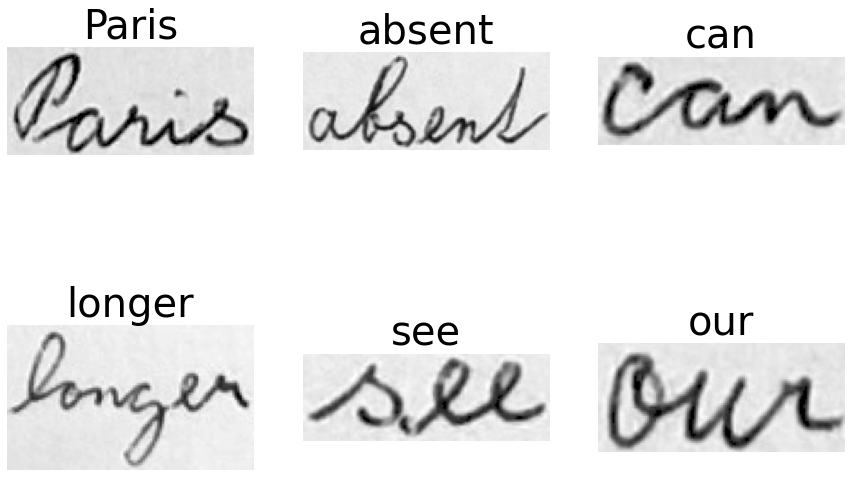

In [8]:
plt.figure(figsize=(15, 10))

img_list = sample(os.listdir('datasets/raw/breta/raw/breta/en_raw/'), 6)

for i in range(6):
    ax = plt.subplot(2, 3, i + 1)
    img_dir = 'datasets/raw/breta/raw/breta/en_raw/' + img_list[i]
    image = cv2.imread(img_dir, cv2.IMREAD_GRAYSCALE)
    plt.imshow(image, cmap='gray')
    plt.title(img_list[i].split('_')[0], fontsize=40)
    plt.axis('off')

 #### 2. **IAM Handwriting Data  [85000 images]**
 
 ***Few Sample Image of this Dataset.***

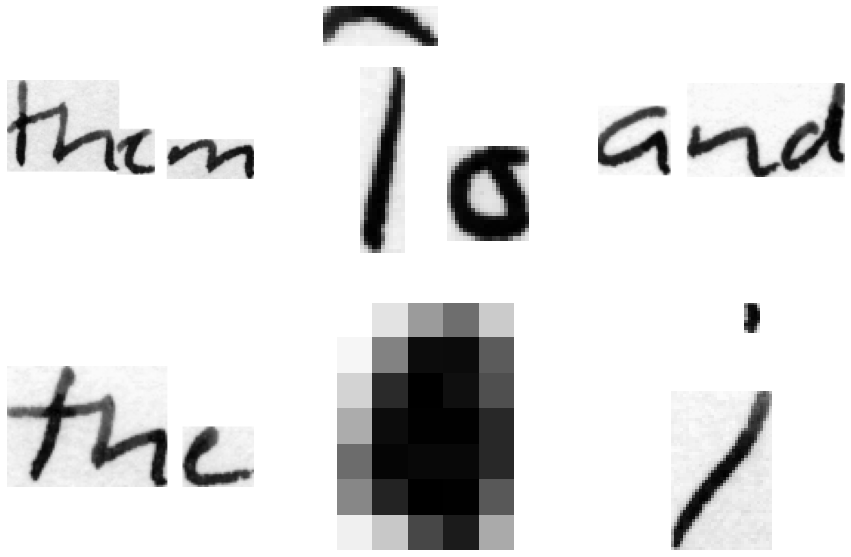

In [9]:
plt.figure(figsize=(15, 10))

img_list = sample(os.listdir('datasets/raw/iam/words/b02/b02-097/'), 6)

for i in range(6):
    ax = plt.subplot(2, 3, i + 1)
    img_dir = 'datasets/raw/iam/words/b02/b02-097/' + img_list[i]
    image = cv2.imread(img_dir, cv2.IMREAD_GRAYSCALE)
    plt.imshow(image, cmap='gray')
    #     plt.title(img_list[i].split('_')[0], fontsize=40)
    plt.axis('off')

 #### 3. **CVL Handwriting Data  [84000 images]**
 
 ***Few Sample Image of this Dataset.***

 #### 4. **ORAND CAR (Courtesy Amount Recognition) Handwriting Data  [11700 images]**
 
 ***Few Sample Image of this Dataset.***

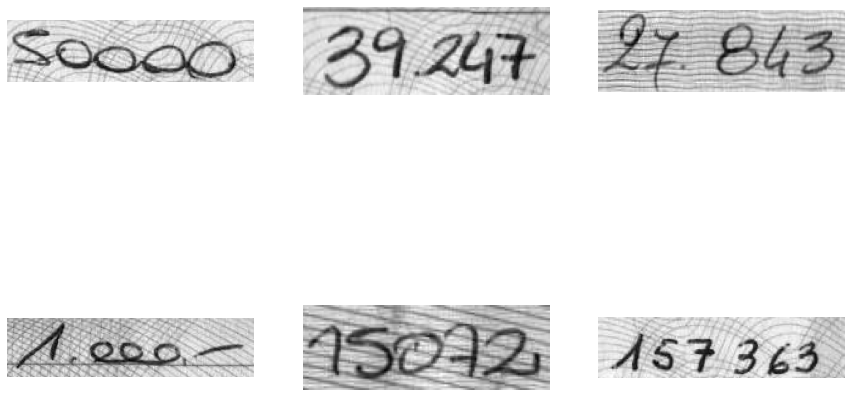

In [10]:
plt.figure(figsize=(15, 10))

img_list = sample(
    os.listdir('datasets/raw/orand/ORAND-CAR-2014/CAR-A/a_train_images/'), 6)

for i in range(6):
    ax = plt.subplot(2, 3, i + 1)
    img_dir = 'datasets/raw/orand/ORAND-CAR-2014/CAR-A/a_train_images/' + \
        img_list[i]
    image = cv2.imread(img_dir, cv2.IMREAD_GRAYSCALE)
    plt.imshow(image, cmap='gray')
    #     plt.title(img_list[i].split('_')[0], fontsize=40)
    plt.axis('off')

## **Creating Various Helping Functions**

 #### **Function for Progress Bar**
 
 ***The function will help in visulaizing a progress bar for any progess.***

In [11]:
# the function will print a progress bar from starting point "iteration" to end point "total"
def print_progress_bar(iteration, total, prefix='', suffix=''):
    #     Call in a loop to create terminal progress bar.
    #     Args:
    #         iteration: current iteration (Int)
    #         total: total iterations (Int)
    #         prefix: prefix string (Str)
    #         suffix: suffix string (Str)

    if iteration % (total // 100) == 0:
        length = 40
        iteration += 1
        percent = (100 * iteration) // (total * 99 / 100)
        filled_length = int(length * percent / 100)
        bar = '█' * filled_length + '-' * (length - filled_length)
        print('\r%s |%s| %s%% %s' % (prefix, bar, percent, suffix), end='\r')

        if iteration >= total * 99 / 100:
            print()

 #### **Functions for Extraction of Image Datasets**
 
 ***These functions will help in extracting images from each dataset and saving them in `words-final` folder and storing them in individual dataset folder name and naming them as `<word>_<dataset-num>_<timestamp>.png`.***

***For example:*** `car_2_1528457794.9072268.png `***- file corresponds to the image of a word `car` from IAM data stored in `words-final/iam/` folder.***

 - #### **Google Drive Data**

In [12]:
# function to extract Gdrive data


def extract_breta(location, output, number=1):
    # args:-
    # location: where the source dataset is present
    # output: where the extracted dataset will be stored
    # number: the number of the dataset
    output = os.path.join(location, output)

    # check if output folder not created, then create it
    if not os.path.exists(output):
        os.makedirs(output)

    # now we will extract image from each internal folder of this dataset
    for sub in [
            'raw/breta/words', 'raw/breta/archive', 'raw/breta/cz_raw',
            'raw/breta/en_raw'
    ]:
        folder = os.path.join(location, sub)

        # craeting list to store the path of the each image of this dataset
        img_list = os.listdir(os.path.join(folder))

        # now each image will be stored in the "output" folder
        for i, data in enumerate(img_list):
            word = data.split('_')[0]
            img = os.path.join(folder, data)
            out = os.path.join(
                output,
                '%s_%s_%s.png' % (word, number, data.split('_')[-1][:-4]))
            Image.open(img).save(out)
            # printing the current status in form of progress bar
            print_progress_bar(i, len(img_list))
    # total images we got from the dataset
    print("\tNumber of words:", len([n for n in os.listdir(output)]))

 - #### **IAM Data**

In [13]:
# Words with these characters are removed
prohibited = [
    ',', '(', ')', ';', ':', '/', '\\', '#', '"', '?', '!', '*', '_', '&'
]

# function to extract IAM data


def extract_iam(location, output, number=2):
    # args:-
    # location: where the source dataset is present
    # output: where the extracted dataset will be stored
    # number: the number of the dataset
    output = os.path.join(location, output)
    err_output = os.path.join(location, 'words_with_error')
    # check if output folder not created, then create it
    if not os.path.exists(output):
        os.makedirs(output)
    # check if output with error folder not created, then create it
    if not os.path.exists(err_output):
        os.makedirs(err_output)

    folder = os.path.join(location, 'words')
    label_file = os.path.join(location, 'words.txt')

    # from here we will read the words.txt file and extract the coressponding word of the image
    length = len(open(label_file).readlines())

    with open(label_file) as fp:
        for i, line in enumerate(fp):
            if line[0] != '#':
                l = line.strip().split(" ")
                impath = os.path.join(
                    folder, l[0].split('-')[0],
                    l[0].split('-')[0] + '-' + l[0].split('-')[1],
                    l[0] + '.png')
                word = l[-1]

                # check if image have any prohibited character
                if (os.stat(impath).st_size != 0
                        and word not in ['.', '-', "'"]
                        and not any(i in word for i in prohibited)):

                    out = output if l[1] == 'ok' else err_output
                    outpath = os.path.join(
                        out, "%s_%s_%s.png" % (word, number, time.time()))
                    # now each image will be stored in the "output" folder
                    copyfile(impath, outpath)

            # printing the current status in form of progress bar
            print_progress_bar(i, length)

    # total images we got from the dataset
    print("\tNumber of words:", len([n for n in os.listdir(output)]))

 - #### **CVL Data**

 - #### **ORAND Data**

In [14]:
# function to extract CVL data


def extract_orand(location, output, number=4):

    # args:-
    # location: where the source dataset is present
    # output: where the extracted dataset will be stored
    # number: the number of the dataset

    # check if output folder not created, then create it
    output = os.path.join(location, output)
    if not os.path.exists(output):
        os.makedirs(output)

    # now we will extract image from each internal folder of this dataset
    for sub in ['ORAND-CAR-2014/CAR-A', 'ORAND-CAR-2014/CAR-B']:
        folder = os.path.join(location, sub)
        # craeting list to store the path of the each image of this dataset

        l_files = glob.glob(os.path.join(folder, '*.txt'))
        length = sum(1 for fl in l_files for line in open(fl))

        itr = 0
        # from here we will read the two text files and extract the coressponding text of the image
        for fl in l_files:
            im_folder = fl[:-6] + 'images'
            with open(fl) as f:
                for line in f:
                    im, word = line.strip().split('\t')
                    impath = os.path.join(im_folder, im)

                    if os.stat(impath).st_size != 0:
                        outpath = os.path.join(
                            output,
                            '%s_%s_%s.png' % (word, number, time.time()))

                        # now each image will be stored in the "output" folder
                        copyfile(impath, outpath)

                    # printing the current status in form of progress bar
                    print_progress_bar(itr, length)
                    itr += 1

    # total images we got from the dataset
    print("\tNumber of words:", len([n for n in os.listdir(output)]))

 #### **Function for Image Handling**
 
 ***These function will help in handling the images.***

In [15]:
# variable for minimum height of image
SMALL_HEIGHT = 800

# function help in showing image using matplotlib.pyplot


def implt(img, cmp=None, t=''):
    plt.imshow(img, cmap=cmp)
    plt.title(t)
    plt.show()


# function help in resizing image to given height.


def resize(img, height=SMALL_HEIGHT, always=False):
    if (img.shape[0] > height or always):
        rat = height / img.shape[0]
        return cv2.resize(img, (int(rat * img.shape[1]), height))

    return img


# function help in scaling the image ratio


def ratio(img, height=SMALL_HEIGHT):
    return img.shape[0] / height


# function to extend 2D image (numpy array) in vertical and horizontal direction.Shape of result image will match 'shape' variable


def img_extend(img, shape):

    #     Args:
    #         img: image to be extended
    #         shape: shape (tuple) of result image
    #     Returns:
    #         Extended image

    x = np.zeros(shape, np.uint8)
    x[:img.shape[0], :img.shape[1]] = img
    return x

In [16]:

#function to detect the page from an image
def page_detection(image, area_thresh = 0.5):
    
    small = resize(image)
    # Edge detection
    image_edges = _edges_detection(small, 200, 250)
    
    # Close gaps between edges (double page clouse => rectangle kernel)
    closed_edges = cv2.morphologyEx(image_edges, 
                                    cv2.MORPH_CLOSE, 
                                    np.ones((5, 11)))
    # Countours
    page_contour = _find_page_contours(closed_edges, small, area_thresh)

    # Recalculate to original scale
    page_contour = page_contour.dot(ratio(image, small.shape[0]))
    # Transform prespective
    new_image = _persp_transform(image, page_contour)
    return new_image
   
#function to detect the page edge from an image
def _edges_detection(img, minVal, maxVal):
    #we will preprocess the image: greyscale image => perform thresholding => apply filter => put border to the page
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    img = cv2.bilateralFilter(img, 9, 75, 75)#used for smoothening images and reducing noise, while preserving edges.
    img = cv2.adaptiveThreshold(img, 255,# the method where the threshold value (thresholding is the simplest method of segmenting images),
                                cv2.ADAPTIVE_THRESH_GAUSSIAN_C,#  is calculated for smaller regions 
                                cv2.THRESH_BINARY, 115, 4)

    # Median blur replace center pixel by median of pixels
    # => removes thin details
    img = cv2.medianBlur(img, 11)

    # Add black border - detection of border touching pages
    img = cv2.copyMakeBorder(img, 5, 5, 5, 5,
                             cv2.BORDER_CONSTANT,
                             value=[0, 0, 0])
    return cv2.Canny(img, minVal, maxVal)# used to detect the edges in an image. 


def _four_corners_sort(pts):#Sort corners in order: top-left, bottom-left, bottom-right, top-right.
    
    diff = np.diff(pts, axis=1)
    summ = pts.sum(axis=1)
    return np.array([pts[np.argmin(summ)],
                     pts[np.argmax(diff)],
                     pts[np.argmax(summ)],
                     pts[np.argmin(diff)]])


def _contour_offset(cnt, offset):#Offset contour because to adjust border width.
    
    cnt += offset
    cnt[cnt < 0] = 0
    return cnt


def _find_page_contours(edges, img, area_thresh):#Finding corner points of page contour.
    
    contours, hierarchy = cv2.findContours(edges,
                                                cv2.RETR_TREE,
                                                cv2.CHAIN_APPROX_SIMPLE)
    
    # Finding biggest rectangle otherwise return original corners
    height = edges.shape[0]
    width = edges.shape[1]
    MIN_COUNTOUR_AREA = height * width * area_thresh
    MAX_COUNTOUR_AREA = (width - 10) * (height - 10)

    max_area = MIN_COUNTOUR_AREA
    page_contour = np.array([[0, 0],
                             [0, height-5],
                             [width-5, height-5],
                             [width-5, 0]])

    for cnt in contours:
        perimeter = cv2.arcLength(cnt, True)
        approx = cv2.approxPolyDP(cnt, 0.03 * perimeter, True)

        # Page has 4 corners and it is convex
        if (len(approx) == 4 and
                cv2.isContourConvex(approx) and
                max_area < cv2.contourArea(approx) < MAX_COUNTOUR_AREA):
            
            max_area = cv2.contourArea(approx)
            page_contour = approx[:, 0]

    # Sort corners and offset them
    page_contour = _four_corners_sort(page_contour)
    return _contour_offset(page_contour, (-5, -5))


def _persp_transform(img, s_points):#Transform perspective from start points to target points.
    
    
    # Euclidean distance - calculate maximum height and width
    height = max(np.linalg.norm(s_points[0] - s_points[1]),
                 np.linalg.norm(s_points[2] - s_points[3]))
    width = max(np.linalg.norm(s_points[1] - s_points[2]),
                 np.linalg.norm(s_points[3] - s_points[0]))
    
    # Create target points
    t_points = np.array([[0, 0],
                        [0, height],
                        [width, height],
                        [width, 0]], np.float32)
    
    if s_points.dtype != np.float32:
        s_points = s_points.astype(np.float32)
    
    M = cv2.getPerspectiveTransform(s_points, t_points)# function to change image perspective
    return cv2.warpPerspective(img, M, (int(width), int(height)))

In [17]:

#Detect words on the page & return array of word's (bounding boxes)
def word_detection(image, join=False):#Detecting the words bounding boxes. Return: numpy array of bounding boxes [x, y, x+w, y+h]
    
    # Preprocess image for word detection
    blurred = cv2.GaussianBlur(image, (5, 5), 18)
    edge_img = _edge_detect(blurred)#function to detect edge in image of page
    ret, edge_img = cv2.threshold(edge_img, 50, 255, cv2.THRESH_BINARY)
    bw_img = cv2.morphologyEx(edge_img, cv2.MORPH_CLOSE,#Morphological transformations are some simple operations based on the image shape. 
                              np.ones((15,15), np.uint8))

    return _text_detect(bw_img, image, join)


def sort_words(boxes):#Sort boxes - (x, y, x+w, y+h) from left to right, top to bottom.
    
    
    mean_height = sum([y2 - y1 for _, y1, _, y2 in boxes]) / len(boxes)
    
    boxes.view('i8,i8,i8,i8').sort(order=['f1'], axis=0)#i8 is int64 character charcter code
    current_line = boxes[0][1]
    lines = []
    tmp_line = []
    for box in boxes:
        if box[1] > current_line + mean_height:
            lines.append(tmp_line)
            tmp_line = [box]
            current_line = box[1]            
            continue
        tmp_line.append(box)
    lines.append(tmp_line)
        
    for line in lines:
        line.sort(key=lambda box: box[0])
        
    return lines


def _edge_detect(im):#Edge detection using sobel operator on each layer individually.Sobel operator is applied for each image layer (RGB)
    
    return np.max(np.array([_sobel_detect(im[:,:, 0]),
                            _sobel_detect(im[:,:, 1]),
                            _sobel_detect(im[:,:, 2])]), axis=0)


def _sobel_detect(channel):#Sobel detection main function.
    
    sobelX = cv2.Sobel(channel, cv2.CV_16S, 1, 0)
    sobelY = cv2.Sobel(channel, cv2.CV_16S, 0, 1)
    sobel = np.hypot(sobelX, sobelY)
    sobel[sobel > 255] = 255
    return np.uint8(sobel)


def union(a,b):#function for union operation
        
    x = min(a[0], b[0])
    y = min(a[1], b[1])
    w = max(a[0]+a[2], b[0]+b[2]) - x
    h = max(a[1]+a[3], b[1]+b[3]) - y
    return [x, y, w, h]

def _intersect(a,b):#function for intersection operation
        
    x = max(a[0], b[0])
    y = max(a[1], b[1])
    w = min(a[0]+a[2], b[0]+b[2]) - x
    h = min(a[1]+a[3], b[1]+b[3]) - y
    if w<0 or h<0:
        return False
    return True

def _group_rectangles(rec):#Function to Union intersecting rectangles.
#     Args:
#         rec - list of rectangles in form [x, y, w, h]
#     Return:
#         list of grouped ractangles 

    tested = [False for i in range(len(rec))]
    final = []
    i = 0
    while i < len(rec):
        if not tested[i]:
            j = i+1
            while j < len(rec):
                if not tested[j] and _intersect(rec[i], rec[j]):
                    rec[i] = union(rec[i], rec[j])
                    tested[j] = True
                    j = i
                j += 1
            final += [rec[i]]
        i += 1
            
    return final


def _text_detect(img, image, join=False):#Text detection using contours.
    
    small = resize(img, 2000)
    
    # Finding contours
    mask = np.zeros(small.shape, np.uint8)
    cnt, hierarchy = cv2.findContours(np.copy(small),
                                           cv2.RETR_CCOMP,
                                           cv2.CHAIN_APPROX_SIMPLE)
    
    index = 0    
    boxes = []
    # Go through all contours in top level
    while (index >= 0):
        x,y,w,h = cv2.boundingRect(cnt[index])
        cv2.drawContours(mask, cnt, index, (255, 255, 255), cv2.FILLED)
        maskROI = mask[y:y+h, x:x+w]
        # Ratio of white pixels to area of bounding rectangle
        r = cv2.countNonZero(maskROI) / (w * h)
        
        # Limits for text
        if (r > 0.1
            and 1600 > w > 10
            and 1600 > h > 10
            and h/w < 3
            and w/h < 10
            and (60 // h) * w < 1000):
            boxes += [[x, y, w, h]]
            
        index = hierarchy[0][index][0]

    if join:
        boxes = _group_rectangles(boxes)

    # image for drawing bounding boxes
    small = cv2.cvtColor(small, cv2.COLOR_GRAY2RGB)
    bounding_boxes = np.array([0,0,0,0])
    for (x, y, w, h) in boxes:
        cv2.rectangle(small, (x, y),(x+w,y+h), (0, 255, 0), 2)
        bounding_boxes = np.vstack((bounding_boxes,
                                    np.array([x, y, x+w, y+h])))
        
    implt(small, t='Bounding rectangles')
    
    boxes = bounding_boxes.dot(ratio(image, small.shape[0])).astype(np.int64)
    return boxes[1:]  
    


In [18]:

#function to detect the characters from an image

def _classify(img, step=2, RNN=False, slider=(60, 60)):#Slice the image and return raw output
    length = (img.shape[1] - slider[1]) // 2 + 1
    if RNN:
        input_seq = np.zeros((1, length, slider[0]*slider[1]), dtype=np.float32)
        input_seq[0][:] = [img[:, loc * step: loc * step + slider[1]].flatten()
                           for loc in range(length)]
        pred = RNN_model.eval_feed({'inputs:0': input_seq,
                                    'length:0': [length],
                                    'keep_prob:0': 1})[0]
    else:
        input_seq = np.zeros((length, slider[0]*slider[1]), dtype=np.float32)
        input_seq[:] = [img[:, loc * step: loc * step + slider[1]].flatten()
                        for loc in range(length)]
        pred = CNN_model.run(input_seq)
        
    return pred
    

def segment(img, step=2, RNN=False, debug=False):#Take preprocessed image of word and returns array of positions separating characters.
    
    slider = CNN_slider
    if RNN:
        slider = RNN_slider
    
    #slicing the image
    pred = _classify(img, step=step, RNN=RNN, slider=slider)

    # Finalize the gap positions (position of gap between word charcetrs) from raw prediction
    gaps = []
    last_gap = 0
    gap_count = 1
    gap_position_sum = slider[1] / 2
    first_gap = True
    gap_block_first = 0
    gap_block_last = slider[1] / 2

    for i, p in enumerate(pred):
        if p == 1:
            gap_position_sum += i * step + slider[1] / 2
            gap_block_last = i * step + slider[1] / 2
            gap_count += 1
            last_gap = 0
            if gap_block_first == 0:
                gap_block_first = i * step + slider[1] / 2
        else:
            if gap_count != 0 and last_gap >= 1:
                if first_gap:
                    gaps.append(int(gap_block_last))
                    first_gap = False
                else:
                    gaps.append(int(gap_position_sum // gap_count))
                gap_position_sum = 0
                gap_count = 0
            gap_block_first = 0
            last_gap += 1

    if gap_block_first != 0:
        gaps.append(int(gap_block_first))
    else:
        gap_position_sum += (len(pred) - 1) * 2 + slider[1]/2
        gaps.append(int(gap_position_sum / (gap_count + 1)))
        
    if debug:
        # Drawing lines (the lines will seperate each character of word)
        img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
        for gap in gaps:
            cv2.line(img,
                     ((int)(gap), 0),
                     ((int)(gap), slider[0]),
                     (0, 255, 0), 1)
        implt(img, t="Separated characters")
        
    return gaps

 #### **Function for Image Normalization**
 
 ***These function will help in normalizing the images of words and letters.<br>Main functions: `word_normalization` , `letter_normalization` , `image_standardization`***

In [19]:
# function that linearly scales each image in "image" variable to have mean 0 and variance 1.


def image_standardization(image):  # Main Function

    # args:-
    # image: input image to be standardized

    # Standardizes by subtracting the mean of the image itself from each pixel and enforces unit variance.
    return tf.image.per_image_standardization(image)


# Crop and add border to word image i.e. bounding box.


def _crop_add_border(img, height, threshold=50, border=True, border_size=15):

    # args:-
    # img: input image to be cropped and add border
    # height: height of image to be croped
    # threshold: threshold value which is used to classify the pixel values.
    # border: want to create word image border
    # border_size: size of border width

    # If the pixel value is smaller than the threshold, it is set to 0, otherwise it is set to a maximum value i.e same as image pixel value.
    ret, img = cv2.threshold(img, threshold, 255, cv2.THRESH_TOZERO)

    x0 = 0
    y0 = 0
    x1 = img.shape[1]
    y1 = img.shape[0]

    for i in range(img.shape[0]):
        if np.count_nonzero(img[i, :]) > 1:
            y0 = i
            break
    for i in reversed(range(img.shape[0])):
        if np.count_nonzero(img[i, :]) > 1:
            y1 = i + 1
            break
    for i in range(img.shape[1]):
        if np.count_nonzero(img[:, i]) > 1:
            x0 = i
            break
    for i in reversed(range(img.shape[1])):
        if np.count_nonzero(img[:, i]) > 1:
            x1 = i + 1
            break

    # cropping the image to given height
    if height != 0:
        img = resize(img[y0:y1, x0:x1], height, True)
    else:
        img = img[y0:y1, x0:x1]

    # adding border to word image if "True"
    if border:
        return cv2.copyMakeBorder(img,
                                  0,
                                  0,
                                  border_size,
                                  border_size,
                                  cv2.BORDER_CONSTANT,
                                  value=[0, 0, 0])
    return img


# Tilt the image by given angle i.e if characters are tilted.


def _tilt_by_angle(img, angle, height):
    dist = np.tan(angle) * height
    width = len(img[0])
    sPoints = np.float32([[0, 0], [0, height], [width, height], [width, 0]])

    # Dist is positive for angle < 0.7; negative for angle > 2.6
    # Image must be shifed to right
    if dist > 0:
        tPoints = np.float32([[0, 0], [dist, height], [width + dist, height],
                              [width, 0]])
    else:
        tPoints = np.float32([[-dist, 0], [0, height], [width, height],
                              [width - dist, 0]])

    # function to change image perspective
    M = cv2.getPerspectiveTransform(sPoints, tPoints)

    # function to merge perspective to original image
    return cv2.warpPerspective(img, M, (int(width + abs(dist)), height))


# Detect the angle and tilt the image i.e if word are tilted.


def _word_tilt(img, height, border=True, border_size=15):

    # args:-
    # img: input image to be tilted
    # height: height of image to be tilted
    # border: want to create word image border
    # border_size: size of border width

    # Function in OpenCV is used to detect the edges in an image
    edges = cv2.Canny(img, 50, 150, apertureSize=3)

    # Function in OpenCV is used to detect the lines in an image
    lines = cv2.HoughLines(edges, 1, np.pi / 180, 30)

    if lines is not None:
        meanAngle = 0
        # Set min number of valid lines
        numLines = np.sum(1 for l in lines if l[0][1] < 0.7 or l[0][1] > 2.6)
        if numLines > 1:
            meanAngle = np.mean(
                [l[0][1] for l in lines if l[0][1] < 0.7 or l[0][1] > 2.6])

        # Look for angle with correct value
        if meanAngle != 0 and (meanAngle < 0.7 or meanAngle > 2.6):

            img = _tilt_by_angle(img, meanAngle, height)
    return _crop_add_border(img, height, 50, border, border_size)


# function to detect edge in image using Sobel operator
def _sobel_detect(channel):
    sobelX = cv2.Sobel(channel, cv2.CV_16S, 1, 0)
    sobelY = cv2.Sobel(channel, cv2.CV_16S, 0, 1)

    # Combine x, y gradient magnitudes sqrt(x^2 + y^2)
    sobel = np.hypot(sobelX, sobelY)  # hypotenuse
    sobel[sobel > 255] = 255
    return np.uint8(sobel)


# class for hysteresis thresholding


class HysterThresh:
    def __init__(self, img):
        img = 255 - img
        img = (img - np.min(img)) / (np.max(img) - np.min(img)) * 255
        hist, bins = np.histogram(img.ravel(), 256, [0, 256])

        self.high = np.argmax(hist) + 65
        self.low = np.argmax(hist) + 45
        self.diff = 255 - self.high

        self.img = img
        self.im = np.zeros(img.shape, dtype=img.dtype)

    # function for image retrieval
    def get_image(self):
        self._hyster()
        return np.uint8(self.im)

    def _hyster_rec(self, r, c):
        h, w = self.img.shape
        for ri in range(r - 1, r + 2):
            for ci in range(c - 1, c + 2):
                if (h > ri >= 0 and w > ci >= 0 and self.im[ri, ci] == 0
                        and self.high > self.img[ri, ci] >= self.low):
                    self.im[ri, ci] = self.img[ri, ci] + self.diff
                    self._hyster_rec(ri, ci)

    def _hyster(self):
        r, c = self.img.shape
        for ri in range(r):
            for ci in range(c):
                if (self.img[ri, ci] >= self.high):
                    self.im[ri, ci] = 255
                    self.img[ri, ci] = 255
                    self._hyster_rec(ri, ci)


# Function for word normalization using hystheresis thresholding.


def _hyst_word_norm(image):

    # args:-
    # image: input image to be cropped and add border

    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    img = cv2.bilateralFilter(gray, 10, 10, 30)
    return HysterThresh(img).get_image()


# function in which we preprocess a word - resize, binarize, tilt world.


def word_normalization(image,
                       height,
                       border=True,
                       tilt=True,
                       border_size=15,
                       hyst_norm=False):  # Main Function

    # args:-
    # image: input image to be cropped and add border
    # height: height of image to be croped
    # border: want to tilt word image border
    # tilt: want to tilt word image
    # border_size: size of border width
    # hyst_norm: want to use hysteresis thresholding

    # resizing image
    image = resize(image, height, True)

    # if want to use hysteresis thresholding to normalize word
    if hyst_norm:
        th = _hyst_word_norm(image)
    else:

        # else use the OpenCV to greyscale, normalize and then threshold
        img = cv2.bilateralFilter(image, 10, 30, 30)
        gray = 255 - cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
        norm = cv2.normalize(gray, None, 0, 255, cv2.NORM_MINMAX)
        ret, th = cv2.threshold(norm, 50, 255, cv2.THRESH_TOZERO)

    # if True tilt the word image else crop and add border to it
    if tilt:
        return _word_tilt(th, height, border, border_size)
    return _crop_add_border(img=th,
                            height=height,
                            border=border,
                            border_size=border_size)


# function to resize bigger side of the image to given size


def _resize_letter(img, size=56):

    # args:-
    # img: input image
    # size: size of image after resize

    if (img.shape[0] > img.shape[1]):
        rat = size / img.shape[0]
        return cv2.resize(img, (int(rat * img.shape[1]), size))
    else:
        rat = size / img.shape[1]
        return cv2.resize(img, (size, int(rat * img.shape[0])))
    return img


# function to preprocess a letter - crop, resize


def letter_normalization(image, is_thresh=True, dim=False):

    # args:-
    # image: input image to be cropped and add border
    # is_thresh: whether imahe is hysteresis thresholded
    # dim: size of border width

    if is_thresh and image.shape[0] > 0 and image.shape[1] > 0:
        image = _crop_add_border(image, height=0, threshold=80, border=False)

    resized = image
    if image.shape[0] > 1 and image.shape[1] > 1:
        resized = _resize_letter(image)

    result = np.zeros((64, 64), np.uint8)
    offset = [0, 0]
    # Calculate offset for smaller size
    if image.shape[0] > image.shape[1]:
        offset = [int((result.shape[1] - resized.shape[1]) / 2), 4]
    else:
        offset = [4, int((result.shape[0] - resized.shape[0]) / 2)]
    # Replace zeros by image
    result[offset[1]:offset[1] + resized.shape[0],
           offset[0]:offset[0] + resized.shape[1]] = resized

    if dim:
        return result, image.shape
    return result

In [20]:
# Main function that will use the normalized functions
def words_norm(location, output):

    # check if the folder exist
    if os.path.exists(output):
        print("THIS DATASET IS BEING SKIPPED")
        print("Output folder already exists:", output)
        return 1
    else:
        output = os.path.join(output, 'words_nolines')
        os.makedirs(output)

    # create a list of all images in words_final folder
    imgs = glob.glob(os.path.join(location, data_folder, '*.png'))
    length = len(imgs)

    for i, img_path in enumerate(imgs):
        image = cv2.imread(img_path)
        # Simple check for invalid images
        if image.shape[0] > 20:
            cv2.imwrite(
                os.path.join(output, os.path.basename(img_path)),
                word_normalization(image,
                                   height=64,
                                   border=False,
                                   tilt=True,
                                   hyst_norm=False))

        # visualizing the current progress
        print_progress_bar(i, len(imgs))

    # printing the number of normalized words
    print("\tNumber of normalized words:",
          len([n for n in os.listdir(output)]))

 #### **Function for Creating the CSV file for Training, Testing, Devlopment (i.e. Validation) Data**
 
 ***The function will help in creating the csv file of the normalized images of words and letters into train, test and validation.***

In [21]:
# function to create csv
def create_csv(datadir):

    # args:-
    # datadir: where the source dataset is present i.e afetr normalization

    print('Creating CSV File...')

    # get each image paths afer normalization
    img_paths = {
        'train': glob.glob(os.path.join(datadir, 'train', '*.png')),
        'dev': glob.glob(os.path.join(datadir, 'dev', '*.png')),
        'test': glob.glob(os.path.join(datadir, 'test', '*.png'))
    }

    for split in ['train', 'dev', 'test']:
        print("For " + split.capitalize() + "ing " + "Dataset: ")
        print('Converting word images to ' + split.capitalize() + '  List...')
        labels = np.array([
            os.path.basename(name).split('_')[0] for name in img_paths[split]
        ])
        length = len(img_paths[split])
        images = np.empty(length, dtype=object)

        for i, img in enumerate(img_paths[split]):
            gaplines = 'None'
            if os.path.isfile(img[:-3] + 'txt'):
                with open(img[:-3] + 'txt', 'r') as fp:
                    gaplines = str(simplejson.load(fp))[1:-1]
            images[i] = (cv2.imread(img, 0), gaplines)
            print_progress_bar(i, length)

        with open(os.path.join(datadir, split + '.csv'), 'w') as csvfile:
            print('Converting ' + split.capitalize() +
                  ' List of images to CSV...')
            fieldnames = ['label', 'shape', 'image', 'gaplines']
            writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
            writer.writeheader()
            for i in range(length):
                writer.writerow({
                    fieldnames[0]:
                    labels[i],
                    fieldnames[1]:
                    str(images[i][0].shape)[1:-1],
                    fieldnames[2]:
                    str(list(images[i][0].flatten()))[1:-1],
                    fieldnames[3]:
                    images[i][1]
                })
                print_progress_bar(i, length)

    print('\tCSV files created!')

 #### **Functions for Loading & creating Datasets**

In [22]:
CHARS = [
    '', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N',
    'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'a', 'b', 'c',
    'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r',
    's', 't', 'u', 'v', 'w', 'x', 'y', 'z', '0', '1', '2', '3', '4', '5', '6',
    '7', '8', '9', '.', '-', '+', "'"
]

CHAR_SIZE = len(CHARS)
idxs = [i for i in range(len(CHARS))]
idx_2_chars = dict(zip(idxs, CHARS))
'''
    This gives
    {0: '', 1: 'A', 2: 'B', 3: 'C', 4: 'D', 5: 'E', 6: 'F', 7: 'G', 8: 'H', 9: 'I', 10: 'J',
    11: 'K', 12: 'L', 13: 'M', 14: 'N', 15: 'O', 16: 'P', 17: 'Q', 18: 'R', 19: 'S', 20: 'T',
    21: 'U', 22: 'V', 23: 'W', 24: 'X', 25: 'Y', 26: 'Z', 27: 'a', 28: 'b', 29: 'c', 30: 'd',
    31: 'e', 32: 'f', 33: 'g', 34: 'h', 35: 'i', 36: 'j', 37: 'k', 38: 'l', 39: 'm', 40: 'n',
    41: 'o', 42: 'p', 43: 'q', 44: 'r', 45: 's', 46: 't', 47: 'u', 48: 'v', 49: 'w', 50: 'x',
    51: 'y', 52: 'z', 53: '0', 54: '1', 55: '2', 56: '3', 57: '4', 58: '5', 59: '6', 60: '7',
    61: '8', 62: '9', 63: '.', 64: '-', 65: '+', 66: "'"}
'''
chars_2_idx = dict(zip(CHARS, idxs))
'''
    This gives
    {'': 0, 'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7, 'H': 8, 'I': 9, 'J': 10,
    'K': 11, 'L': 12, 'M': 13, 'N': 14, 'O': 15, 'P': 16, 'Q': 17, 'R': 18, 'S': 19, 'T': 20,
    'U': 21, 'V': 22, 'W': 23, 'X': 24, 'Y': 25, 'Z': 26, 'a': 27, 'b': 28, 'c': 29, 'd': 30,
    'e': 31, 'f': 32, 'g': 33, 'h': 34, 'i': 35, 'j': 36, 'k': 37, 'l': 38, 'm': 39, 'n': 40,
    'o': 41, 'p': 42, 'q': 43, 'r': 44, 's': 45, 't': 46, 'u': 47, 'v': 48, 'w': 49, 'x': 50,
    'y': 51, 'z': 52, '0': 53, '1': 54, '2': 55, '3': 56, '4': 57, '5': 58, '6': 59, '7': 60,
    '8': 61, '9': 62, '.': 63, '-': 64, '+': 65, "'": 66}

'''

# function to conver character to coressponding index


def char2idx(c, sequence=False):
    if sequence:
        return chars_2_idx[c] + 1
    return chars_2_idx[c]


# function to conver index to coressponding character


def idx2char(idx, sequence=False):
    if sequence:
        return idx_2_chars[idx - 1]
    return idx_2_chars[idx]


# function to load word images with corresponding labels and gaplines (if load_gaplines == True).


def load_words_data(dataloc='data/words/', is_csv=False, load_gaplines=False):

    #     Args:
    #         dataloc: image folder location/CSV file
    #         is_csv: using CSV files
    #         load_gaplines: wheter or not load gaplines (lines separating letters) positions files
    #     Returns: tuple as => (images, labels (, gaplines))

    print("Loading words...")
    if type(dataloc) is not list:
        dataloc = [dataloc]

    # creating the csv file with columns {'shape', 'image','label'}
    if is_csv:
        csv.field_size_limit(sys.maxsize)
        length = 0
        for loc in dataloc:
            with open(loc) as csvfile:
                reader = csv.reader(csvfile)
                length += max(sum(1 for row in csvfile) - 1, 0)

        labels = np.empty(length, dtype=object)
        images = np.empty(length, dtype=object)
        i = 0
        for loc in dataloc:
            print(loc)
            with open(loc) as csvfile:
                reader = csv.DictReader(csvfile)
                for row in reader:
                    shape = np.fromstring(row['shape'], sep=',', dtype=int)
                    img = np.fromstring(row['image'], sep=', ',
                                        dtype=np.uint8).reshape(shape)
                    labels[i] = row['label']
                    images[i] = img

                    # visualizing the current progress
                    print_progress_bar(i, length)
                    i += 1
    else:
        img_list = []
        tmp_labels = []
        for loc in dataloc:
            tmp_list = glob.glob(os.path.join(loc, '*.png'))
            img_list += tmp_list
            tmp_labels += [name[len(loc):].split("_")[0] for name in tmp_list]

        labels = np.array(tmp_labels)
        images = np.empty(len(img_list), dtype=object)

        # Load grayscaled images
        for i, img in enumerate(img_list):
            images[i] = cv2.imread(img, 0)
            print_progress_bar(i, len(img_list))

        # Load gaplines (lines separating letters) from txt files
        if load_gaplines:
            gaplines = np.empty(len(img_list), dtype=object)
            for i, name in enumerate(img_list):
                with open(name[:-3] + 'txt', 'r') as fp:
                    gaplines[i] = np.array(simplejson.load(fp))

    if load_gaplines:
        assert len(labels) == len(images) == len(gaplines)
    else:
        assert len(labels) == len(images)
    print("-> Number of words:", len(labels))

    if load_gaplines:
        return (images, labels, gaplines)
    return (images, labels)


# Function to transform word images with gaplines into individual chars.


def _words2chars(images, labels, gaplines):
    # Total number of chars
    length = sum([len(l) for l in labels])

    imgs = np.empty(length, dtype=object)
    new_labels = []

    height = images[0].shape[0]

    idx = 0
    for i, gaps in enumerate(gaplines):
        for pos in range(len(gaps) - 1):
            imgs[idx] = images[i][0:height, gaps[pos]:gaps[pos + 1]]
            new_labels.append(char2idx(labels[i][pos]))
            idx += 1

    print("Loaded chars from words:", length)
    return imgs, new_labels


# Function to load chars images with corresponding labels.


def load_chars_data(charloc='data/charclas/',
                    wordloc='data/words/',
                    lang='cz'):

    #     Args:
    #         charloc: character images FOLDER LOCATION
    #         wordloc: word images with gaplines FOLDER LOCATION
    #     Returns:
    #         (images, labels)

    print("Loading chars...")
    images = np.zeros((1, 4096))
    labels = []

    if charloc != '':
        # Get subfolders with chars
        dir_list = glob.glob(os.path.join(charloc, lang, "*/"))
        dir_list.sort()

        # if lang == 'en':
        chars = CHARS[:53]

        assert [d[-2] if d[-2] != '0' else '' for d in dir_list] == chars

        # For every label load images and create corresponding labels
        # cv2.imread(img, 0) - for loading images in grayscale
        # Images are scaled to 64x64 = 4096 px
        for i in range(len(chars)):
            img_list = glob.glob(os.path.join(dir_list[i], '*.jpg'))
            imgs = np.array(
                [letter_normalization(cv2.imread(img, 0)) for img in img_list])
            images = np.concatenate([images, imgs.reshape(len(imgs), 4096)])
            labels.extend([i] * len(imgs))

    if wordloc != '':
        imgs, words, gaplines = load_words_data(wordloc, load_gaplines=True)
        if lang != 'cz':
            words = np.array([unidecode.unidecode(w) for w in words])
        imgs, chars = _words2chars(imgs, words, gaplines)

        labels.extend(chars)
        images2 = np.zeros((len(imgs), 4096))
        for i in range(len(imgs)):
            print_progress_bar(i, len(imgs))
            images2[i] = letter_normalization(imgs[i]).reshape(1, 4096)

        images = np.concatenate([images, images2])

    images = images[1:]
    labels = np.array(labels)

    print("-> Number of chars:", len(labels))
    return (images, labels)


# Function to load gap data from location with corresponding labels.


def load_gap_data(loc='data/gapdet/large/',
                  slider=(60, 120),
                  seq=False,
                  flatten=True):

    #     Args:
    #         loc: location of folder with words separated into gap data
    #              images have to by named as label_timestamp.jpg, label is 0 or 1
    #         slider: dimensions of of output images
    #         seq: Store images from one word as a sequence
    #         flatten: Flatten the output images
    #     Returns:
    #         (images, labels)

    print('Loading gap data...')
    dir_list = glob.glob(os.path.join(loc, "*/"))
    dir_list.sort()

    if slider[1] > 120:
        slider[1] = 120

    cut_s = None if (120 - slider[1]) // 2 <= 0 else (120 - slider[1]) // 2
    cut_e = None if (120 - slider[1]) // 2 <= 0 else -(120 - slider[1]) // 2

    if seq:
        images = np.empty(len(dir_list), dtype=object)
        labels = np.empty(len(dir_list), dtype=object)

        for i, loc in enumerate(dir_list):
            img_list = glob.glob(os.path.join(loc, '*.jpg'))
            if (len(img_list) != 0):
                img_list = sorted(
                    imglist,
                    key=lambda x: int(x[len(loc):].split("_")[1][:-4]))
                images[i] = np.array([
                    (cv2.imread(img, 0)[:, cut_s:cut_e].flatten()
                     if flatten else cv2.imread(img, 0)[:, cut_s:cut_e])
                    for img in img_list
                ])
                labels[i] = np.array(
                    [int(name[len(loc):].split("_")[0]) for name in img_list])

    else:
        images = np.zeros((1, slider[0] * slider[1]))
        labels = []

        for i in range(len(dir_list)):
            img_list = glob.glob(os.path.join(dir_list[i], '*.jpg'))
            if (len(img_list) != 0):
                imgs = np.array(
                    [cv2.imread(img, 0)[:, cut_s:cut_e] for img in img_list])
                images = np.concatenate(
                    [images,
                     imgs.reshape(len(imgs), slider[0] * slider[1])])
                labels.extend([int(img[len(dirlist[i])]) for img in img_list])

        images = images[1:]
        labels = np.array(labels)

    if seq:
        print("-> Number of words / gaps and letters:", len(labels), '/',
              sum([len(l) for l in labels]))
    else:
        print("-> Number of gaps and letters:", len(labels))
    return (images, labels)


# Shuffle array of numpy arrays such that each pair a[x][i] and a[y][i] remains the same.


def corresponding_shuffle(a):

    #     Args:
    #         a: array of same length numpy arrays
    #     Returns:
    #         Array a with shuffled numpy arrays

    assert all([len(a[0]) == len(a[i]) for i in range(len(a))])
    p = np.random.permutation(len(a[0]))
    for i in range(len(a)):
        a[i] = a[i][p]
    return a


# Function to create a sparse representention of sequences.


def sequences_to_sparse(sequences):

    #     Args:
    #         sequences: a list of lists of type dtype where each element is a sequence
    #     Returns:
    #         A tuple with (indices, values, shape)

    indices = []
    values = []

    for n, seq in enumerate(sequences):
        indices.extend(zip([n] * len(seq), range(len(seq))))
        values.extend(seq)

    indices = np.asarray(indices, dtype=np.int64)
    values = np.asarray(values, dtype=np.int32)
    shape = np.asarray(
        [len(sequences), np.asarray(indices).max(0)[1] + 1], dtype=np.int64)

    return indices, values, shape

 #### **Classes for Handling Training**
 
 ***These classes will help in handling the tarining process.***

 #### **Classes for feeding data during training.**

In [23]:
# Iterator for feeding CTC model during training.
class BucketDataIterator():
    def __init__(self,
                 images,
                 targets,
                 num_buckets=5,
                 slider=(60, 30),
                 augmentation=None,
                 dropout=0.0,
                 train=True):

        # Args:
        # images: input images
        # targest: input image label

        self.train = train
        self.slider = slider
        self.augmentation = augmentation
        self.dropout = dropout

        # extending image size and storing input dimensions
        for i in range(len(images)):
            images[i] = img_extend(
                images[i],
                (self.slider[0], max(images[i].shape[1], self.slider[1])))
        in_length = [image.shape[1] for image in images]

        # Create pandas dataFrame and sort it by images width (length)
        self.dataFrame = pd.DataFrame({
            'in_length': in_length,
            'images': images,
            'targets': targets
        }).sort_values('in_length').reset_index(drop=True)

        # creating the iteratoor
        bsize = int(len(images) / num_buckets)
        self.num_buckets = num_buckets
        self.buckets = []

        for bucket in range(num_buckets - 1):
            self.buckets.append(
                self.dataFrame.iloc[bucket * bsize:(bucket + 1) * bsize])
        self.buckets.append(self.dataFrame.iloc[(num_buckets - 1) * bsize:])

        self.buckets_size = [len(bucket) for bucket in self.buckets]
        self.cursor = np.array([0] * num_buckets)
        self.bucket_order = np.random.permutation(num_buckets)
        self.bucket_cursor = 0
        self.shuffle()
        print("Iterator created.")

    # Shuffle idx bucket or each bucket separately.

    def shuffle(self, idx=None):
        for i in [idx] if idx is not None else range(self.num_buckets):
            self.buckets[i] = self.buckets[i].sample(frac=1).reset_index(
                drop=True)
            self.cursor[i] = 0

    # Creates next training batch of size.

    def next_batch(self, batch_size):

        #         Args:
        #             batch_size: size of next batch
        #         Retruns:
        #             (images, labels, images lengths, labels lengths)

        i_bucket = self.bucket_order[self.bucket_cursor]
        # Increment cursor and shuffle in case of new round
        self.bucket_cursor = (self.bucket_cursor + 1) % self.num_buckets
        if self.bucket_cursor == 0:
            self.bucket_order = np.random.permutation(self.num_buckets)

        if self.cursor[i_bucket] + batch_size > self.buckets_size[i_bucket]:
            self.shuffle(i_bucket)

        # Handle too big batch sizes
        if (batch_size > self.buckets_size[i_bucket]):
            batch_size = self.buckets_size[i_bucket]

        res = self.buckets[i_bucket].iloc[self.cursor[i_bucket]:self.
                                          cursor[i_bucket] + batch_size]
        self.cursor[i_bucket] += batch_size

        # Padding the input sequence and output
        input_max = max(res['in_length'])

        input_imgs = np.zeros((batch_size, self.slider[0], input_max, 1),
                              dtype=np.uint8)
        for i, img in enumerate(res['images']):
            input_imgs[i][:, :res['in_length'].values[i], 0] = img

        if self.train:
            # augmenting each image
            input_imgs = self.augmentation.augment_images(input_imgs)
        input_imgs = input_imgs.astype(np.float32)

        targets = sequences_to_sparse(res['targets'].values)
        return input_imgs, targets, res['in_length'].values

 #### **Classes for controling machine learning processes.**

In [24]:
# Creating live plot during training
class TrainingPlot:

    train_loss = []
    train_acc = []
    valid_acc = []
    test_iter = 0
    loss_iter = 0
    interval = 0
    ax1 = None
    ax2 = None
    fig = None

    def __init__(self, steps, test_itr, loss_itr):
        self.test_iter = test_itr
        self.loss_iter = loss_itr
        self.interval = steps

        self.fig, self.ax1 = plt.subplots()
        self.ax2 = self.ax1.twinx()
        self.ax1.set_autoscaley_on(True)
        plt.ion()

        self._update_plot()

        # Description
        self.ax1.set_xlabel('Iteration')
        self.ax1.set_ylabel('Train Loss')
        self.ax2.set_ylabel('Valid. Accuracy')

        # Axes limits
        self.ax1.set_ylim([0, 10])

    def _update_plot(self):
        self.fig.canvas.draw()

    def update_loss(self, loss_train, index):
        self.train_loss.append(loss_train)
        if len(self.train_loss) == 1:
            self.ax1.set_ylim([0, min(10, math.ceil(loss_train))])
        self.ax1.plot(self.loss_iter * np.arange(len(self.train_loss)),
                      self.train_loss,
                      'b',
                      linewidth=1.0)

        self._update_plot()

    def update_acc(self, acc_val, acc_train, index):
        self.valid_acc.append(acc_val)
        self.train_acc.append(acc_train)

        self.ax2.plot(self.test_iter * np.arange(len(self.valid_acc)),
                      self.valid_acc,
                      'r',
                      linewidth=1.0)
        self.ax2.plot(self.test_iter * np.arange(len(self.train_acc)),
                      self.train_acc,
                      'g',
                      linewidth=1.0)

        self.ax2.set_title('Valid. Accuracy: {:.4f}'.format(
            self.valid_acc[-1]))

        self.updatePlot()


# Class for training data and feeding train function.
class DataSet:
    images = None
    labels = None
    length = 0
    index = 0

    def __init__(self, img, lbl):
        self.images = img
        self.labels = lbl
        self.length = len(img)
        self.index = 0

    # Return the next batch from the data set.
    def next_batch(self, batch_size):
        start = self.index
        self.index += batch_size

        if self.index > self.length:
            # Shuffle the data
            perm = np.arange(self.length)
            np.random.shuffle(perm)
            self.images = self.images[perm]
            self.labels = self.labels[perm]
            # Start next epoch
            start = 0
            self.index = batch_size

        end = self.index
        return self.images[start:end], self.labels[start:end]


# Create feed directly for model training.


class DataIterator(BucketDataIterator):
    def next_feed(self, batch_size):
        (inputs_, targets_, inputs_length_) = self.next_batch(batch_size)
        return {
            inputs: inputs_,
            inputs_length: inputs_length_,
            targets: targets_,
            keep_prob: (1.0 - self.dropout) if self.train else 1.0
        }

 #### ***Provide functions and classes:***
***Model       = Class for loading and using trained models from tensorflow<br>
create_cell = function for creatting RNN cells with wrappers.***

In [25]:
# Loading and running isolated tf graph.
class Model():
    def __init__(self, loc, operation='activation', input_name='x'):

        #         loc: location of file containing saved model
        #         operation: name of operation for running the model
        #         input_name: name of input placeholder

        self.input = input_name + ":0"
        self.graph = tf.compat.v1.Graph()
        self.sess = tf.compat.v1.Session(graph=self.graph)
        with self.graph.as_default():
            saver = tf.compat.v1.train.import_meta_graph(loc + '.meta',
                                               clear_devices=True)
            saver.restore(self.sess, loc)
            self.op = self.graph.get_operation_by_name(operation).outputs[0]

#     Run the specified operation on given data.

    def run(self, data):
        return self.sess.run(self.op, feed_dict={self.input: data})

#     Run the specified operation with given feed

    def eval_feed(self, feed):
        return self.sess.run(self.op, feed_dict=feed)

#     Run given operation with the feed.

    def run_op(self, op, feed, output=True):
        if output:
            return self.sess.run(
                self.graph.get_operation_by_name(op).outputs[0],
                feed_dict=feed)
        else:
            self.sess.run(self.graph.get_operation_by_name(op), feed_dict=feed)


# Create single RNN cell based on cell_fn.
def _create_single_cell(cell_fn,
                        num_units,
                        is_residual=False,
                        is_dropout=False,
                        keep_prob=None):
    cell = cell_fn(num_units)
    if is_dropout:
        cell = DropoutWrapper(cell, input_keep_prob=keep_prob)
    if is_residual:
        cell = ResidualWrapper(cell)
    return cell


# Create corresponding number of RNN cells with given wrappers.


def create_cell(num_units,
                num_layers,
                num_residual_layers,
                is_dropout=False,
                keep_prob=None,
                cell_fn=LSTMCell):
    cell_list = []

    for i in range(num_layers):
        cell_list.append(
            _create_single_cell(
                cell_fn=cell_fn,
                num_units=num_units,
                is_residual=(i >= num_layers - num_residual_layers),
                is_dropout=is_dropout,
                keep_prob=keep_prob))

    if num_layers == 1:
        return cell_list[0]
    return MultiRNNCell(cell_list)

 #### ***Provide functions for the final Prediction after Training:***
***ctc_recognise = Function to Recognise words using CTC Model.***

In [26]:

def ctc_recognise(img):#Recognising words using CTC Model.
    
    img = word_normalization(
        img,
        64,
        border=False,
        tilt=False,
        hyst_norm=False)
    length = img.shape[1]
    # Input has shape [batch_size, height, width, 1]
    input_imgs = np.zeros(
            (1, 64, length, 1), dtype=np.uint8)
    input_imgs[0][:, :length, 0] = img

    pred = CTC_MODEL.eval_feed({
        'inputs:0': input_imgs,
        'inputs_length:0': [length],
        'keep_prob:0': 1})[0]

    word = ''
    for i in pred:
        word += idx2char(i)
    return word


## Preprocessing the Data

![](https://cdn1.scalablepath.com/_next/image?url=https%3A%2F%2Fcdn-blog.scalablepath.com%2Fuploads%2F2021%2F11%2Fdata-preprocessing-techniques-1.png&w=1200&q=75)

### **Extracting the Data Using the Extraction Functions**

In [27]:
# main raw datasets location
data_folder = 'datasets/raw/'

# output folder name
output_folder = 'words_final'

# dictionary containing each dataset extarction function with source path and the output path folder name
datasets = {
    'breta': [extract_breta,
              os.path.join(data_folder, 'breta'), 1],
    'iam': [extract_iam, os.path.join(data_folder, 'iam'), 2],
    'orand': [extract_orand,
              os.path.join(data_folder, 'orand'), 4]
}

In [28]:
# Starting the extraction process

for ds in list(datasets.keys()):
    print("Processing -", ds)
    entry = datasets[ds]
    try:
        entry[0](entry[1], output_folder, entry[2])
    except FileNotFoundError:
        print("    Error - File not found, skipping dataset", ds)

Processing - breta
 |████████████████████████████████████████| 100.0% 
 |████████████████████████████████████████| 100.0% 
 |████████████████████████████████████████| 100.0% 
 |████████████████████████████████████████| 101.0% 
 |████████████████████████████████████████| 100.0% 
 |████████████████████████████████████████| 101.0% 
	Number of words: 6100
Processing - iam
 |████████████████████████████████████████| 100.0% 
	Number of words: 85012
Processing - orand
 |████████████████████████████████████████| 100.0% 
 |████████████████████████████████████████| 100.0% 
	Number of words: 11719


### **Using the Normalization Functions to Normalize the Data.**



***Normalizing the processed words from the `words_final` folder and storing them***

In [ ]:
data_folder = 'words_final'
location = 'datasets/'
output_folder = os.path.join(location, 'processed')

# check if output folder present or not
if not os.path.exists(output_folder):
    os.makedirs(output_folder)
# Normalizing each dataset
for ds in list(datasets.keys()):
    print("Processing -", ds)
    entry = datasets[ds]
    words_norm(entry[1], os.path.join(output_folder, ds))

Processing - breta
 |████████████████████████████████████████| 100.0% 
	Number of normalized words: 6100
Processing - iam


### **Creating the Train, Test & Validation Sets & Storing as CSV Files**

![](https://i.ibb.co/cvDvTRV/MACHINE-LEARNING.gif)

***Here the the data will now divided into three sets of folder for Training, Testing & Validation. The image labels will be stored in respective CSV files.***



In [ ]:
# location were all the normalized images present
location = 'datasets/'

random.seed(17)  # Make the datasets split random, but reproducible

# output folder were the data splitted into
output_folder = os.path.join(location, 'sets')

# Sets percent distribution of images
test_set = 0.1
validation_set = 0.1

if not os.path.exists(output_folder):
    os.makedirs(output_folder)

imgs = []

# first get all the images path and store them into list and shuffle them
for ds in list(datasets.keys()):
    for loc, _, _ in os.walk(datasets[ds][1].replace("raw", "processed")):
        imgs += glob.glob(os.path.join(loc, '*.png'))

imgs.sort()
random.shuffle(imgs)

length = len(imgs)
sp1 = int((1 - test_set - validation_set) * length)
sp2 = int((1 - test_set) * length)

# now splitting shuffled list into train, test and dev sets
img_paths = {'train': imgs[:sp1], 'dev': imgs[sp1:sp2], 'test': imgs[sp2:]}

i = 0

# begining of the splitting the actual images
for split in ['train', 'dev', 'test']:
    split_output = os.path.join(output_folder, split)
    if not os.path.exists(split_output):
        os.mkdir(split_output)
    for im_path in img_paths[split]:
        copyfile(im_path, os.path.join(split_output,
                                       os.path.basename(im_path)))
        if '_gaplines' in im_path:
            im_path = im_path[:-3] + 'txt'
            copyfile(im_path,
                     os.path.join(split_output, os.path.basename(im_path)))

        # visualizing the current progress
        print_progress_bar(i, length)
        i += 1

    # printing the number of normalized words
    print("\n\tNumber of %s words: %s" %
          (split, len(os.listdir(split_output))))

# deleting the data after saving normalized one's
!rm -r 'datasets/raw' 'datasets/processed'

# Creating the respective csv files
create_csv(output_folder)

## **Preparaing Machine Learning Model**

<img src="https://d1jnx9ba8s6j9r.cloudfront.net/blog/wp-content/uploads/2019/06/What-Is-Machine-Learning-Artificial-Intelligence-With-Python-Edureka.png" />

### Model 1: Using the Connectionist Temporal Classification (CTC) - Word Classification

#### Setting Up the Model Parameters

In [ ]:
%matplotlib inline

#default matplotlib parameters
plt.rcParams['figure.figsize'] = (9.0, 5.0)

slider_size = (64, 64)

layers = 4 #number of layers
residual_layers = 0 #number of layers
units = 512

num_buckets = 10
N_INPUT = slider_size[0] * slider_size[1]
vocab_size = CHAR_SIZE + 2  # Number of different chars + <Padding> and <End of Stateemnt>

learning_rate = 1e-4  
dropout = 0.4

TRAIN_STEPS = 20000
TEST_ITER = 150 #test after given iteration during train
LOSS_ITER = 150 #check loss after given iteration during train
SAVE_ITER = 500 #save model after given iteration during train
EPOCH = 500
BATCH_SIZE = 64 

model_name = 'Classifier1' #model 1: CTC save file name
!mkdir 'datasets/models'

save_loc = 'datasets/models/word-clas/CTC/' #model 1: CTC save location
!mkdir 'datasets/logs'

summaries_dir = 'datasets/logs/word-clas/CTC/' + model_name #model 1: CTC save logs location

if not os.path.exists(save_loc):
    os.makedirs(save_loc)
save_loc += model_name

#### Loading the Image Paths & Labels

In [ ]:
# loading train & dev images
train_images, train_labels = load_words_data('datasets/sets/train.csv',
                                             is_csv=True)
dev_images, dev_labels = load_words_data('datasets/sets/dev.csv', is_csv=True)

#### Resizing & Converting Each Character into Coressponding Index

In [ ]:
data = {
    'train':
    (train_images, train_labels, np.empty(len(train_labels), dtype=object)),
    'dev': (dev_images, dev_labels, np.empty(len(dev_labels), dtype=object))
}

for d in ['train', 'dev']:
    for i in range(len(data[d][0])):
        data[d][0][i] = resize(data[d][0][i], slider_size[1], True)
        data[d][2][i] = [char2idx(c) for c in data[d][1][i]]

print("Training images:", len(train_images))
print("Testing images:", len(dev_images))

#### Data Augmentation

***Performing Augmentation of Images***

In [ ]:
seq = iaa.Sequential([ #This augmenter is simply a list of other augmenters. 
    iaa.Sometimes(0.3, iaa.ElasticTransformation(alpha=(0.5, 10.0),
                                                 sigma=5.0)),
    iaa.OneOf([ #Apply any one of the augmenter randomly
        iaa.GaussianBlur((0, 0.5)), #Applying Gaussian Blur to AugMent
        iaa.AverageBlur(k=(1, 3)), #Applying Average Blur to AugMent
        iaa.MedianBlur(k=(1, 3)), #Applying Median Blur to AugMent
    ]),
    iaa.Sometimes(0.3, 
                  iaa.AdditiveGaussianNoise(scale=0.01 * 255) #Add noise sampled from gaussian distributions elementwise to images.
                 ),
])

#### Data Iterators

***Craeting the Data Iterator Objects***

In [ ]:

#iteraors to feed directly for model training
train_iterator = DataIterator(data['train'][0],
                              data['train'][2],
                              num_buckets,
                              slider_size,
                              augmentation=seq,
                              dropout=dropout,
                              train=True)
test_iterator = DataIterator(data['dev'][0],
                             data['dev'][2],
                             1,
                             slider_size,
                             train=False)

#### Input Placeholders

***A placeholder is a variable in Tensorflow to which data will be assigned sometime later on. It enables us to create processes or operations without the requirement for data. Data is fed into the placeholder as the session starts, and the session is run. We can feed in data into tensorflow graphs using placeholders.***

In [ ]:
# Input placehodlers

tf.compat.v1.disable_eager_execution()

# placeholder for feeding input
inputs = tf.compat.v1.placeholder(shape=(None, slider_size[0], None, 1),
                                  dtype=tf.float32,
                                  name='inputs')

# placeholder for feeding input length
inputs_length = tf.compat.v1.placeholder(shape=(None, ),
                                         dtype=tf.int32,
                                         name='inputs_length')

# placeholder for feeding target
targets = tf.compat.v1.sparse_placeholder(dtype=tf.int32, name='targets')

# placeholder for saving the probability
keep_prob = tf.compat.v1.placeholder(tf.float32, name='keep_prob')

#### Creating The Convolutional Neural Network (CNN) Layers

In [ ]:
SCALE = 0.0003
h_n_pool = 16  # = 2^(number of pooling layers on height)
w_n_pool = 8  # = 2^(number of pooling layers on width)

# 1. Convulation
conv1 = tf.compat.v1.layers.conv2d(
    inputs=inputs,
    filters=64,
    kernel_size=[7, 7],
    strides=(2, 2),
    padding="same",
    #Initializer capable of adapting its scale to the shape of weights tensors.
    kernel_initializer=tf.compat.v1.keras.initializers.VarianceScaling(
        scale=1.0, mode="fan_avg", distribution="uniform"),
    #L2 regularization acts like a force that removes a small percentage of weights at each iteration.
    kernel_regularizer=tf.keras.regularizers.l2(l=0.5 * (SCALE)),
    activation=tf.nn.relu)

conv12 = tf.compat.v1.layers.conv2d(
    inputs=conv1,
    filters=64,
    kernel_size=[5, 5],
    strides=(1, 1),
    padding="same",
    #Initializer capable of adapting its scale to the shape of weights tensors.
    kernel_initializer=tf.compat.v1.keras.initializers.VarianceScaling(
        scale=1.0, mode="fan_avg", distribution="uniform"),
    #L2 regularization acts like a force that removes a small percentage of weights at each iteration.
    kernel_regularizer=tf.keras.regularizers.l2(l=0.5 * (SCALE)),
    activation=tf.nn.relu)

# 2. Max Pooling
pool1 = tf.compat.v1.layers.max_pooling2d(conv12, pool_size=[2, 2], strides=2)

# 3. Inception
conv2 = tf.compat.v1.layers.conv2d(
    inputs=pool1,
    filters=64,
    kernel_size=[5, 5],
    strides=(1, 1),
    padding="same",
    #Initializer capable of adapting its scale to the shape of weights tensors.
    kernel_initializer=tf.compat.v1.keras.initializers.VarianceScaling(
        scale=1.0, mode="fan_avg", distribution="uniform"),
    #L2 regularization acts like a force that removes a small percentage of weights at each iteration.
    kernel_regularizer=tf.keras.regularizers.l2(l=0.5 * (SCALE)),
    activation=tf.nn.relu)

conv22 = tf.compat.v1.layers.conv2d(
    inputs=conv2,
    filters=128,
    kernel_size=[5, 5],
    strides=(1, 1),
    padding="same",
    #Initializer capable of adapting its scale to the shape of weights tensors.
    kernel_initializer=tf.compat.v1.keras.initializers.VarianceScaling(
        scale=1.0, mode="fan_avg", distribution="uniform"),
    #L2 regularization acts like a force that removes a small percentage of weights at each iteration.
    kernel_regularizer=tf.keras.regularizers.l2(l=0.5 * (SCALE)),
    activation=tf.nn.relu)

# 4. Max Pooling
pool2 = tf.compat.v1.layers.max_pooling2d(conv22,
                                          pool_size=[2, 1],
                                          strides=[2, 1])

# 5. Inception
conv3 = tf.compat.v1.layers.conv2d(
    inputs=pool2,
    filters=128,
    kernel_size=[5, 5],
    strides=(1, 1),
    padding="same",
    #Initializer capable of adapting its scale to the shape of weights tensors.
    kernel_initializer=tf.compat.v1.keras.initializers.VarianceScaling(
        scale=1.0, mode="fan_avg", distribution="uniform"),
    kernel_regularizer=tf.keras.regularizers.l2(l=0.5 * (SCALE)),
    activation=tf.nn.relu)
conv32 = tf.compat.v1.layers.conv2d(
    inputs=conv3,
    filters=256,
    kernel_size=[5, 5],
    strides=(1, 1),
    padding="same",
    #Initializer capable of adapting its scale to the shape of weights tensors.
    #L2 regularization acts like a force that removes a small percentage of weights at each iteration.
    kernel_initializer=tf.compat.v1.keras.initializers.VarianceScaling(
        scale=1.0, mode="fan_avg", distribution="uniform"),
    #L2 regularization acts like a force that removes a small percentage of weights at each iteration.
    kernel_regularizer=tf.keras.regularizers.l2(l=0.5 * (SCALE)),
    activation=tf.nn.relu)

# 6. Max Pooling
pool3 = tf.compat.v1.layers.max_pooling2d(conv32, pool_size=[2, 2], strides=2)

# Image patches for RNN
image_patches1 = tf.compat.v1.layers.conv2d(
    inputs=pool3,
    filters=256,
    kernel_size=[slider_size[0] // (h_n_pool), slider_size[1] // (w_n_pool)],
    strides=(1, 1),
    padding="same",
    #Initializer capable of adapting its scale to the shape of weights tensors.
    #L2 regularization acts like a force that removes a small percentage of weights at each iteration.
    kernel_initializer=tf.compat.v1.keras.initializers.VarianceScaling(
        scale=1.0, mode="fan_avg", distribution="uniform"),
    kernel_regularizer=tf.keras.regularizers.l2(l=0.5 * (SCALE)),
    activation=tf.nn.relu)

image_patches = tf.compat.v1.layers.separable_conv2d(# 2-D convolution with separable filters
    inputs=image_patches1,
    filters=1280,
    kernel_size=[slider_size[0] // (h_n_pool), 1],
    strides=(1, 1),
    depth_multiplier=5,
    name='image_patches')

processed_inputs = tf.transpose(tf.squeeze(image_patches, [1]), [1, 0, 2],
                                name='squeeze_transpose')
lengths = inputs_length // w_n_pool

#### Creating The Bidirectional Recurrent Neural Network (Bi-RNN) Layers

In [ ]:

#Create single RNN cell for Forward feeding network.
enc_cell_fw = create_cell(units,
                          layers,
                          residual_layers,
                          is_dropout=True,
                          keep_prob=keep_prob)

#Create single RNN cell for Backward feeding network.
enc_cell_bw = create_cell(units,
                          layers,
                          residual_layers,
                          is_dropout=True,
                          keep_prob=keep_prob)


#Creates a dynamic version of bidirectional recurrent neural network for the output layer.
bi_outputs, _ = tf.compat.v1.nn.bidirectional_dynamic_rnn(
    cell_fw=enc_cell_fw,
    cell_bw=enc_cell_bw,
    inputs=processed_inputs,
    sequence_length=lengths,
    dtype=tf.float32,
    time_major=True)

#concatenate all output layers
con_outputs = tf.concat(bi_outputs, -1)

#connecting each neuron with dense layer
logits = tf.compat.v1.layers.dense(inputs=con_outputs, units=vocab_size)

# Final outputs
decoded, log_prob = tf.compat.v1.nn.ctc_beam_search_decoder( #Performs beam search decoding on the logits given in input.
    logits, lengths, merge_repeated=False)

word_prediction = tf.compat.v1.sparse_tensor_to_dense(decoded[0],
                                                      name='word_prediction')

test_targets = tf.compat.v1.sparse_tensor_to_dense(targets)

#### Optimizers
***An optimizer is a function or an algorithm that modifies the attributes of the neural network, such as weights and learning rate. Thus, it helps in reducing the overall loss and improve the accuracy.***

In [ ]:

#Computes CTC (Connectionist Temporal Classification) loss.
ctc_loss = tf.compat.v1.nn.ctc_loss(targets,
                                    logits,
                                    lengths,
                                    time_major=True,
                                    ctc_merge_repeated=True,
                                    ignore_longer_outputs_than_inputs=True)

#Computes loss (Regularization + CTC).
regularization = tf.compat.v1.get_collection(
    tf.compat.v1.GraphKeys.REGULARIZATION_LOSSES)
loss = tf.compat.v1.identity(tf.compat.v1.reduce_mean(ctc_loss) +
                             sum(regularization),
                             name='loss')

#Used in applying Adam optimizer
optimizer = tf.compat.v1.train.AdamOptimizer(learning_rate)
train_step = optimizer.minimize(loss, name='train_step')

# Label error rate: It is the standard metric for evaluating classification performance. 
label_err_rate = tf.compat.v1.reduce_mean(
    tf.compat.v1.edit_distance(
        tf.compat.v1.cast(decoded[0], tf.compat.v1.int32), targets))

#### Starting Training the Model 1: Connectionist Temporal Classification (CTC)

***Here The training will begin and the model will save afetr completion of each batch***

In [ ]:

# Training
sess = tf.compat.v1.Session()
sess.run(tf.compat.v1.global_variables_initializer())
saver = tf.compat.v1.train.Saver()

tf.compat.v1.summary.scalar('Loss', loss)
tf.compat.v1.summary.scalar('Label_err_rate', label_err_rate)
merged = tf.compat.v1.summary.merge_all()
train_writer = tf.compat.v1.summary.FileWriter(summaries_dir + '/train',
                                               sess.graph)
test_writer = tf.compat.v1.summary.FileWriter(summaries_dir + '/test')

trainPlot = TrainingPlot(TRAIN_STEPS, TEST_ITER, LOSS_ITER)

try:
    for i_batch in range(TRAIN_STEPS):
        fd = train_iterator.next_feed(BATCH_SIZE)
        sess.run(train_step, feed_dict=fd)

        if i_batch % LOSS_ITER == 0:
            # Plotting loss
            with sess.as_default():
                tmpLoss = loss.eval(fd)
            trainPlot.update_loss(tmpLoss, i_batch // LOSS_ITER)

        if i_batch % SAVE_ITER == 0:
            saver.save(sess, save_loc, global_step=i_batch)

        if i_batch % EPOCH == 0:
            fd_test = test_iterator.next_feed(BATCH_SIZE)  # BATCH_SIZE)
            print('Batch %r - Loss: %r' % (i_batch, sess.run(loss, fd)))
            print('    Train Label Err Rate: %r' %
                  sess.run(label_err_rate, feed_dict=fd))
            print('    Eval Label Err Rate: %r' %
                  sess.run(label_err_rate, feed_dict=fd_test))
            print()

except KeyboardInterrupt:
    print('Stopped on batch:', i_batch)
    saver.save(sess, save_loc)
    print('Training interrupted, model saved.')

In [ ]:

#deleting the divided datsets

!rm -r 'datasets/sets/dev' 'datasets/sets/test' 'datasets/sets/train'

### Prediction of the Model 1: Connectionist Temporal Classification (CTC)

<img src="https://behavioralsignals.com/wp-content/uploads/2019/12/What-is-Behavioral-Intent-Prediction.jpg" />

In [ ]:


for i in range(5):
    fd_test = test_iterator.next_feed(BATCH_SIZE)
    predict_, target_ = sess.run([word_prediction, test_targets], fd_test)
    for i, (inp, pred) in enumerate(zip(target_, predict_)):
        print('    expected  > {}'.format(inp))
        print('    predicted > {}'.format(pred))
        if i >= 1:
            break
    print()

### Getting all the test images


In [ ]:
#setting initial parameters and downloading test images

%matplotlib inline
plt.rcParams['figure.figsize'] = (15.0, 10.0)

#getting test image by gdrive
!gdown 1aAo4AYu8ChgS6W0GCiVm3X1nhG1dMnRC

with ZipFile("TEST IMAGES.zip", 'r') as zObject:
    zObject.extractall(path="datasets/test_pages/")
    
#saving all test pages location

IMG=glob.glob('datasets/test_pages/TEST IMAGES/*')

### Loading the Trained Model


In [ ]:

#setting model path
MODEL_LOC_CTC = 'datasets/models/word-clas/CTC/Classifier1-19500'


#Load Saved Model
CTC_MODEL = Model(MODEL_LOC_CTC, 'word_prediction')

test_page_index=0

### TEST IMAGE 1


In [ ]:

image = cv2.cvtColor(cv2.imread(IMG[test_page_index]), cv2.COLOR_BGR2RGB)
implt(image)
test_page_index+=1#increment for next image

In [ ]:
# Crop image and get bounding boxes
crop = page_detection(image)
implt(crop)
boxes = word_detection(crop)
lines = sort_words(boxes)

In [ ]:

#inputted image for testing
implt(crop)
for line in lines:#performing actual prediction
    print(" ".join([ctc_recognise(crop[y1:y2, x1:x2]) for (x1, y1, x2, y2) in line]))

### TEST IMAGE 2


In [ ]:

image = cv2.cvtColor(cv2.imread(IMG[test_page_index]), cv2.COLOR_BGR2RGB)
implt(image)
test_page_index+=1#increment for next image

In [ ]:
# Crop image and get bounding boxes
crop = page_detection(image)
implt(crop)
boxes = word_detection(crop)
lines = sort_words(boxes)

In [ ]:

#inputted image for testing
implt(crop)
for line in lines:#performing actual prediction
    print(" ".join([ctc_recognise(crop[y1:y2, x1:x2]) for (x1, y1, x2, y2) in line]))

### TEST IMAGE 3


In [ ]:

image = cv2.cvtColor(cv2.imread(IMG[test_page_index]), cv2.COLOR_BGR2RGB)
implt(image)
test_page_index+=1#increment for next image

In [ ]:
# Crop image and get bounding boxes
crop = page_detection(image)
implt(crop)
boxes = word_detection(crop)
lines = sort_words(boxes)

In [ ]:

#inputted image for testing
implt(crop)
for line in lines:#performing actual prediction
    print(" ".join([ctc_recognise(crop[y1:y2, x1:x2]) for (x1, y1, x2, y2) in line]))

### TEST IMAGE 4


In [ ]:

image = cv2.cvtColor(cv2.imread(IMG[test_page_index]), cv2.COLOR_BGR2RGB)
implt(image)
test_page_index+=1#increment for next image

In [ ]:
# Crop image and get bounding boxes
crop = page_detection(image)
implt(crop)
boxes = word_detection(crop)
lines = sort_words(boxes)

In [ ]:

#inputted image for testing
implt(crop)
for line in lines:#performing actual prediction
    print(" ".join([ctc_recognise(crop[y1:y2, x1:x2]) for (x1, y1, x2, y2) in line]))

### TEST IMAGE 5


In [ ]:

image = cv2.cvtColor(cv2.imread(IMG[test_page_index]), cv2.COLOR_BGR2RGB)
implt(image)
test_page_index+=1#increment for next image

In [ ]:
# Crop image and get bounding boxes
crop = page_detection(image)
implt(crop)
boxes = word_detection(crop)
lines = sort_words(boxes)

In [ ]:

#inputted image for testing
implt(crop)
for line in lines:#performing actual prediction
    print(" ".join([ctc_recognise(crop[y1:y2, x1:x2]) for (x1, y1, x2, y2) in line]))

### TEST IMAGE 6


In [ ]:

image = cv2.cvtColor(cv2.imread(IMG[test_page_index]), cv2.COLOR_BGR2RGB)
implt(image)
test_page_index+=1#increment for next image

In [ ]:
# Crop image and get bounding boxes
crop = page_detection(image)
implt(crop)
boxes = word_detection(crop)
lines = sort_words(boxes)

In [ ]:

#inputted image for testing
implt(crop)
for line in lines:#performing actual prediction
    print(" ".join([ctc_recognise(crop[y1:y2, x1:x2]) for (x1, y1, x2, y2) in line]))

### TEST IMAGE 7


In [ ]:

image = cv2.cvtColor(cv2.imread(IMG[test_page_index]), cv2.COLOR_BGR2RGB)
implt(image)
test_page_index+=1#increment for next image

In [ ]:
# Crop image and get bounding boxes
crop = page_detection(image)
implt(crop)
boxes = word_detection(crop)
lines = sort_words(boxes)

In [ ]:

#inputted image for testing
implt(crop)
for line in lines:#performing actual prediction
    print(" ".join([ctc_recognise(crop[y1:y2, x1:x2]) for (x1, y1, x2, y2) in line]))

### TEST IMAGE 8


In [ ]:

image = cv2.cvtColor(cv2.imread(IMG[test_page_index]), cv2.COLOR_BGR2RGB)
implt(image)
test_page_index+=1#increment for next image

In [ ]:
# Crop image and get bounding boxes
crop = page_detection(image)
implt(crop)
boxes = word_detection(crop)
lines = sort_words(boxes)

In [ ]:

#inputted image for testing
implt(crop)
for line in lines:#performing actual prediction
    print(" ".join([ctc_recognise(crop[y1:y2, x1:x2]) for (x1, y1, x2, y2) in line]))

### TEST IMAGE 9


In [ ]:

image = cv2.cvtColor(cv2.imread(IMG[test_page_index]), cv2.COLOR_BGR2RGB)
implt(image)
test_page_index=0#resetting as the last predict image

In [ ]:
# Crop image and get bounding boxes
crop = page_detection(image)
implt(crop)
boxes = word_detection(crop)
lines = sort_words(boxes)

In [ ]:

#inputted image for testing
implt(crop)
for line in lines:#performing actual prediction
    print(" ".join([ctc_recognise(crop[y1:y2, x1:x2]) for (x1, y1, x2, y2) in line]))

# THANK YOU

<img src='https://media.giphy.com/media/F0J0uiNS8n0BHSQmDt/giphy.gif' width=300>